In [257]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo 
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt

In [258]:
data = fetch_ucirepo(id=2).data.original

In [259]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [261]:
# convert categorical data to one-hot encoding
data = pd.get_dummies(data, drop_first=True)

In [262]:
# standardize the data
data = (data - data.mean()) / data.std()

In [263]:
# normalize the data
data = (data - data.min()) / (data.max() - data.min())

In [264]:
# drop rows with missing values
data.dropna(inplace=True)

In [265]:
ncols = len(data.columns)
nrows = len(data.index)
X = data.iloc[:, 0:(ncols - 1)]
y = data.iloc[:, (ncols-1)]
X_train, X_test, y_train, y_test = train_test_split(
    X, y)

In [266]:
# Hyperparameters
activations = ['sigmoid', 'tanh', 'relu']
learning_rate = [1e-4, 1e-3, 0.01, 0.1]
max_iterations = [100, 200]  # Number of epochs
num_hidden_layers = [2, 3]


# Try all combinations of hyperparameters
for activation in activations:
    for lr in learning_rate:
        for max_iter in max_iterations:
            for num_layers in num_hidden_layers:
                
                # Initialize the model
                model = keras.Sequential()
                
                early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
                
                model.add(layers.Dense(X_train.shape[1], activation=activation, name="Input_Layer"))
                
                for i in range(num_layers):
                    model.add(layers.Dense(30, activation=activation, kernel_regularizer=keras.regularizers.l2(0.1), name=f"Hidden_Layer_{i+1}"))
                
                model.add(layers.Dense(1, activation='sigmoid', name="Output_Layer"))
                
                # Compile the model
                model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                              loss=keras.losses.BinaryCrossentropy(),
                              metrics=[keras.metrics.BinaryAccuracy()])
                
                # Train the model and store the history
                history = model.fit(X_train, y_train, epochs=max_iter, validation_data=(X_test, y_test), verbose=0, callbacks=[early_stopping])

                # Create subplots: one for accuracy, one for loss
                fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # 2 rows, 1 column

                # Plot accuracy
                ax1.plot(history.history['binary_accuracy'], label='train_accuracy', color='tab:blue')
                ax1.plot(history.history['val_binary_accuracy'], label='val_accuracy', color='tab:cyan')
                ax1.set_title('Model Accuracy')
                ax1.set_ylabel('Accuracy')
                ax1.set_xlabel('Epoch')
                ax1.legend(loc='upper left')

                # Plot loss
                ax2.plot(history.history['loss'], label='train_loss', color='tab:red')
                ax2.plot(history.history['val_loss'], label='val_loss', color='tab:orange')
                ax2.set_title('Model Loss')
                ax2.set_ylabel('Loss')
                ax2.set_xlabel('Epoch')
                ax2.legend(loc='upper left')

                # Set the main title
                plt.suptitle(f'Model: activation={activation}, lr={lr}, max_iter={max_iter}, num_layers={num_layers}')

                # Save the plot to a file
                plt.savefig(f'model-activation{activation}-lr{lr}-max_iter{max_iter}-num_layers{num_layers}.png')
                plt.close()  # Close the plot to avoid overlapping with the next iteration

                print(f'activation={activation}, lr={lr}, max_iter={max_iter}, num_layers={num_layers}')

activation=sigmoid, lr=0.0001, max_iter=100, num_layers=2
activation=sigmoid, lr=0.0001, max_iter=100, num_layers=3
activation=sigmoid, lr=0.0001, max_iter=200, num_layers=2
activation=sigmoid, lr=0.0001, max_iter=200, num_layers=3
activation=sigmoid, lr=0.001, max_iter=100, num_layers=2
activation=sigmoid, lr=0.001, max_iter=100, num_layers=3
activation=sigmoid, lr=0.001, max_iter=200, num_layers=2
activation=sigmoid, lr=0.001, max_iter=200, num_layers=3
activation=sigmoid, lr=0.01, max_iter=100, num_layers=2
activation=sigmoid, lr=0.01, max_iter=100, num_layers=3
activation=sigmoid, lr=0.01, max_iter=200, num_layers=2
activation=sigmoid, lr=0.01, max_iter=200, num_layers=3
activation=sigmoid, lr=0.1, max_iter=100, num_layers=2
activation=sigmoid, lr=0.1, max_iter=100, num_layers=3
activation=sigmoid, lr=0.1, max_iter=200, num_layers=2
activation=sigmoid, lr=0.1, max_iter=200, num_layers=3
activation=tanh, lr=0.0001, max_iter=100, num_layers=2
activation=tanh, lr=0.0001, max_iter=100,

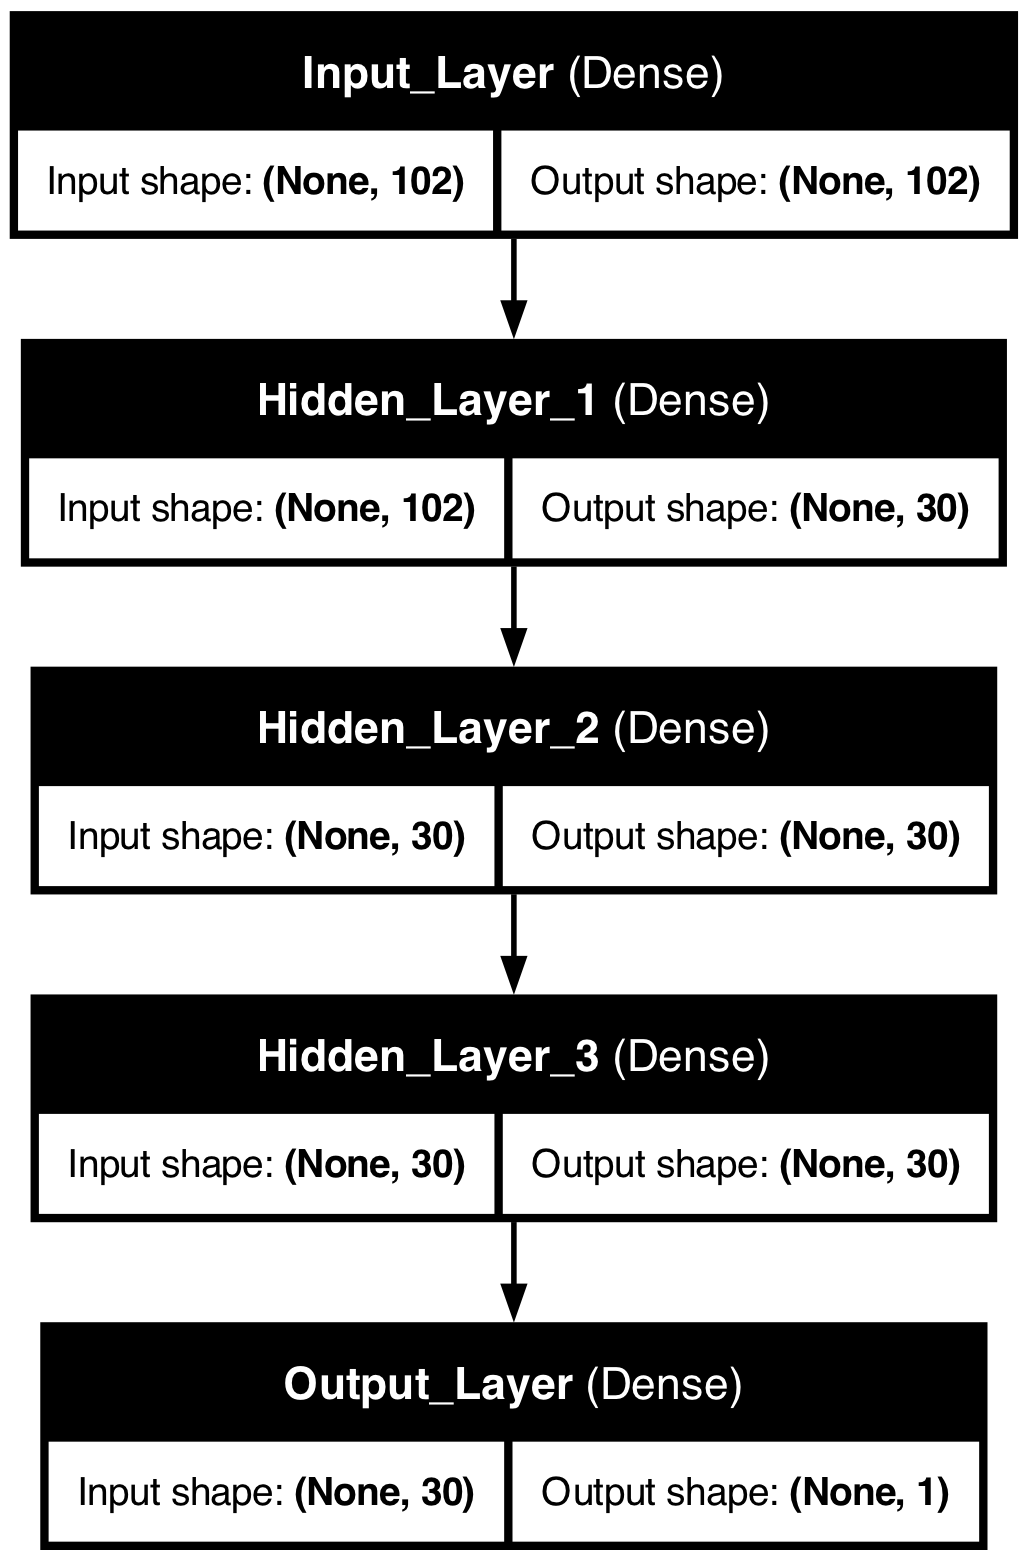

In [267]:
from tensorflow.keras.utils import plot_model

# Assuming you have your model already created
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)